# Task 1: Data Preparation


In [5]:
#importing data and replacing headers
import pandas as pd
#importing data and making the headers
data = pd.read_csv('School-Age-Digital-Connectivity-A1data.csv',header=None, names = ('ISO3', 
                'Countries and areas', 'Region', 'Sub-region','Income Group' , 'Total', 'Rural (Residence)', 
                'Urban (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)',
                'Data source', 'Time period'))
data = data.drop(index=0)
data = data.drop(index=1)
data


ModuleNotFoundError: No module named 'pandas'

In [ ]:
           #mistake 1- whitespace

In [ ]:
# whitespace
for variables in data.columns:
    data[variables] = data[variables].str.strip() if data[variables].dtype == 'object' else data[variables]

In [ ]:
          #mistake 2- impossible values(years greater than 2023)

In [ ]:
#dropping row with impossible values
data = data.drop(index=65)
data = data.drop(index=51)

In [ ]:
           #mistake 3- duplicates

In [ ]:
#checking for duplicate rows
duplicates = data[data.duplicated()]
duplicates

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period


In [ ]:
#dropping the duplicate rows
data = data.drop(index=72)
data = data.drop(index=73)

In [ ]:
            #mistake 4- input mistakes

In [ ]:
#input mistakes(%%)
data.loc[:, 'Total'] = data.loc[:, 'Total'].str.replace('%%', '%')
data.loc[:, 'Urban (Residence)'] = data.loc[:, 'Urban (Residence)'].str.replace('%%', '%')

In [ ]:
             #mistake 5- missing values 

In [ ]:
#finding missing values
print(data.isna().sum())

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Rural (Residence)            2
Urban (Residence)            0
Poorest (Wealth quintile)    6
Richest (Wealth quintile)    7
Data source                  0
Time period                  0
dtype: int64


In [ ]:
#checking data types
data.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                        object
Rural (Residence)            object
Urban (Residence)            object
Poorest (Wealth quintile)    object
Richest (Wealth quintile)    object
Data source                  object
Time period                  object
dtype: object

In [ ]:
#replace missing with mean
columns_missing = ['Rural (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)']

for columns in columns_missing:
  data[columns] = data[columns].str.rstrip('%').astype(float)

column_means = data[columns_missing].mean()
data_cleaned = data.copy()
data_cleaned[columns_missing] = data_cleaned[columns_missing].fillna(column_means)                             
data_cleaned[columns_missing] = data_cleaned[columns_missing].applymap(lambda x: f"{x:.1f}%")

In [ ]:
#checking missing values
print(data_cleaned.isna().sum())

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Rural (Residence)            0
Urban (Residence)            0
Poorest (Wealth quintile)    0
Richest (Wealth quintile)    0
Data source                  0
Time period                  0
dtype: int64


In [ ]:
           #mistake 6- spelling mistakes

In [ ]:
#checking spelling mistakes
data_cleaned['Income Group'].value_counts()

Upper middle income (UM)     27
Lower middle income (LM)     26
Low income (L)               15
High income (H)               5
Lowerr middle income (LM)     1
Name: Income Group, dtype: int64

In [ ]:
#fixing spelling mistakes
corrections = {'Lowerr middle income (LM)': 'Lower middle income (LM)'}
data_cleaned['Income Group'] = data_cleaned['Income Group'].replace(corrections)

In [ ]:
#printing out all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_cleaned

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
2,DZA,Algeria,MENA,MENA,Upper middle income (UM),24%,9.0%,32%,1.0%,77.0%,Multiple Indicator Cluster Survey,2018-19
3,AGO,Angola,SSA,ESA,Lower middle income (LM),17%,2.0%,24%,0.0%,62.0%,Demographic and Health Survey,2015-16
4,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71.0%,88%,47.0%,99.0%,Demographic and Health Survey,2015-16
5,BGD,Bangladesh,SA,SA,Lower middle income (LM),37%,33.0%,52%,9.0%,76.0%,Multiple Indicator Cluster Survey,2019
6,BRB,Barbados,LAC,LAC,High income (H),66%,61.0%,69%,10.0%,98.0%,Multiple Indicator Cluster Survey,2012
7,BEN,Benin,SSA,WCA,Low income (L),4%,1.0%,7%,0.0%,16.0%,Demographic and Health Survey,2017-18
8,BOL,Bolivia,LAC,LAC,Lower middle income (LM),12%,4.0%,17%,19.0%,61.7%,EDSA,2016
9,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),59%,51.0%,76%,8.0%,96.0%,Multiple Indicator Cluster Survey,2011-12
10,BRA,Brazil,LAC,LAC,Upper middle income (UM),83%,51.0%,89%,84.0%,97.0%,Brazil Continuous National Household Sample Su...,2018
11,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76%,66.0%,81%,35.0%,97.0%,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [ ]:
number_of_rows = data_cleaned.shape[0]
print("Number of Rows:" ,number_of_rows)

Number of Rows: 74


In [ ]:
#outliers- look at dominiaon republic 100% of rurual will not have internet 
#gambia 65% for a low income country



In [ ]:
cleaned_A1data = data_cleaned

In [ ]:
"""
Write dataframe object into a csv file
XXXXX.to_csv('XXXXX.csv', index=False)
Please replace XXXXX with your dataframe variable and name of the csv file.
"""
cleaned_A1data.to_csv('cleaned_A1data.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 

In [ ]:
import pandas as pd
data = pd.read_csv('cleaned_A1data.csv')
data

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24%,9.0%,32%,1.0%,77.0%,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17%,2.0%,24%,0.0%,62.0%,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71.0%,88%,47.0%,99.0%,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),37%,33.0%,52%,9.0%,76.0%,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),66%,61.0%,69%,10.0%,98.0%,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),4%,1.0%,7%,0.0%,16.0%,Demographic and Health Survey,2017-18
6,BOL,Bolivia,LAC,LAC,Lower middle income (LM),12%,4.0%,17%,19.0%,61.7%,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),59%,51.0%,76%,8.0%,96.0%,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),83%,51.0%,89%,84.0%,97.0%,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76%,66.0%,81%,35.0%,97.0%,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [ ]:
#converting data into integers
columns_to_convert = ['Total', 'Rural (Residence)', 'Urban (Residence)', 'Poorest (Wealth quintile)',
                      'Richest (Wealth quintile)']
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.str.rstrip('%').astype(float) / 100.0)
data

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.090,0.32,0.01,0.770,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.020,0.24,0.00,0.620,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.710,0.88,0.47,0.990,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.330,0.52,0.09,0.760,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.66,0.610,0.69,0.10,0.980,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),0.04,0.010,0.07,0.00,0.160,Demographic and Health Survey,2017-18
6,BOL,Bolivia,LAC,LAC,Lower middle income (LM),0.12,0.040,0.17,0.19,0.617,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),0.59,0.510,0.76,0.08,0.960,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),0.83,0.510,0.89,0.84,0.970,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),0.76,0.660,0.81,0.35,0.970,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [ ]:
#means for ech of the columns
means = ['Total', 'Rural (Residence)', 'Poorest (Wealth quintile)', 'Richest (Wealth quintile)']
means = data[means].mean()
means

Total                        0.352297
Rural (Residence)            0.278892
Poorest (Wealth quintile)    0.190270
Richest (Wealth quintile)    0.616878
dtype: float64

Text(0.5, 0.98, '')

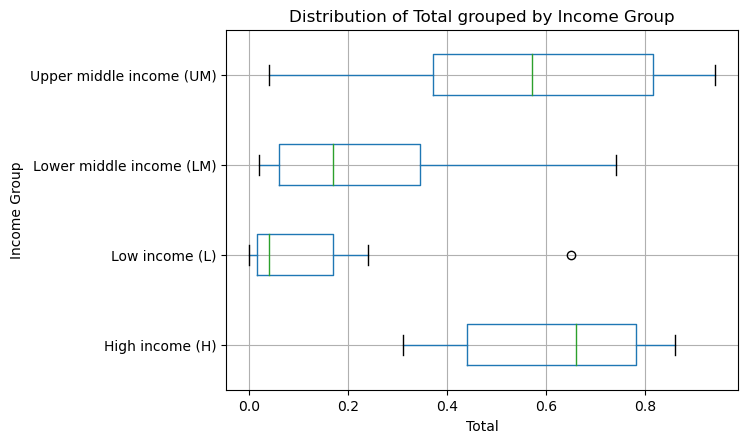

In [ ]:
#side by side boxplot for Total grouped by Income Group
import matplotlib.pyplot as plt
data.boxplot(column='Total', by='Income Group', vert=False)
plt.title('Distribution of Total grouped by Income Group')
plt.xlabel('Total')
plt.ylabel('Income Group')
plt.suptitle('')

In [ ]:
#mean for each Income Group in total
group = ['Income Group', 'Total']
collective = data[group]
mean_income = collective.groupby('Income Group')['Total'].mean()
mean_income

Income Group
High income (H)             0.610000
Low income (L)              0.117333
Lower middle income (LM)    0.227037
Upper middle income (UM)    0.560370
Name: Total, dtype: float64

## Task 2.2 

In [ ]:
#median for rural
median_rural = data['Rural (Residence)'].median()
median_rural = median_rural * 100
median_rural

13.5

In [ ]:
#median for urban
median_urban = data['Urban (Residence)'].median()
median_urban = median_urban * 100
median_urban

40.5

In [ ]:
#top ten for rural
top_ruralcountries = data.nlargest(10, 'Rural (Residence)')
columns_to_select = ['ISO3', 'Countries and areas', 'Rural (Residence)']
top_ruralcountries = top_ruralcountries[columns_to_select]
top_ruralcountries

,ISO3,Countries and areas,Rural (Residence)
22,DOM,Dominican Republic,1.00
55,SRB,Serbia,0.91
62,MKD,North Macedonia,0.90
64,TON,Tonga,0.90
33,JPN,Japan,0.83
51,RUS,Russian Federation,0.79
46,MNE,Montenegro,0.74
25,GEO,Georgia,0.72
2,ARM,Armenia,0.71
14,CHL,Chile,0.70


In [ ]:
#top ten for urban
top_urbancountries = data.nlargest(10, 'Urban (Residence)')
columns_to_select = ['ISO3', 'Countries and areas', 'Urban (Residence)']
top_urbancountries = top_urbancountries[columns_to_select]
top_urbancountries

,ISO3,Countries and areas,Urban (Residence)
55,SRB,Serbia,0.97
51,RUS,Russian Federation,0.94
64,TON,Tonga,0.94
25,GEO,Georgia,0.93
62,MKD,North Macedonia,0.93
15,CHN,China,0.91
8,BRA,Brazil,0.89
14,CHL,Chile,0.89
2,ARM,Armenia,0.88
46,MNE,Montenegro,0.86


## Task 2.3 

In [ ]:
wealth_stats = data[['Poorest (Wealth quintile)', 'Richest (Wealth quintile)']] * 100
wealth_stats = wealth_stats.describe().round(3)
wealth_stats

,Poorest (Wealth quintile),Richest (Wealth quintile)
count,74.000,74.000
mean,19.027,61.688
std,26.631,33.166
min,0.000,0.000
25%,0.000,34.500
50%,6.000,67.000
75%,22.750,93.000
max,100.000,100.000


In [ ]:
median = wealth_stats.median().round(3)
median

Poorest (Wealth quintile)    20.888
Richest (Wealth quintile)    64.344
dtype: float64